In [1]:
!pip install phik

In [2]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [3]:
import sklearn
print(sklearn.__version__)

1.5.1


# HR-analytics

## Business task and work plan 

The company has provided data on employee characteristics, including the level of job satisfaction. This information is obtained from feedback forms where employees fill out a survey, and based on the results, their satisfaction level is calculated.

Job satisfaction directly influences employee turnover. Predicting of quitting is one of the objectives of this study because unexpected resignations pose risks to the company, especially when a key employee leaves.

Objective:
The main goals of the project are:

	1.	To predict the level of employee satisfaction based on customer-provided data.
	2.	To predict potential employee leave from the company (quitting)

Criteria:

The target variables are the employee’s level of satisfaction and the employee’s resignation from the company.

Work Plan:

1.  Data Loading:
	•	Import datasets for analysis.
	•	Import necessary libraries.
 
2.	Data Preprocessing:
	•	Perform data cleaning to handle missing values and remove duplicates.
	•	Convert data types as necessary.
	•	Combine datasets if needed.
 
3.	Exploratory Data Analysis:
	•	Conduct correlation analysis
 
4.	Create pipeline for data pre-processing and selection of the best model 
	•	Build models and select the best-performing model.
 
7.	Final Conclusions:
	•	Summarize the findings and provide insights.

Datasets:

- **train_job_satisfaction_rate.csv** and **train_quit.csv**: 
  datasets contain employee data, including the target variables job_satisfaction_rate and quit.
- **test_features.csv**:
  dataset contains test data.
- **test_target_job_satisfaction_rate** and **test_target_quit.csv**:
  datasets contain the target variables for the test set.

## Data upload

In [311]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os #dataset import
import phik
from scipy.stats import ttest_ind

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import (OneHotEncoder,  
                                    OrdinalEncoder,
                                    StandardScaler,
                                    MinMaxScaler, 
                                    LabelEncoder
                                   )
from sklearn.impute import SimpleImputer
# загрузите инструмент для автоподбора гиперпараметров
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier, DummyRegressor

from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import (
                confusion_matrix,
                roc_auc_score, 
                make_scorer
             ) 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn._oldcore')

Upload datasets

In [10]:
pth1_job_satisf = 'train_job_satisfaction_rate.csv'
pth2_job_satisf = '/datasets/train_job_satisfaction_rate.csv'


pth1_test_features = 'test_features.csv'
pth2_test_features = '/datasets/test_features.csv'

pth1_target = 'test_target_job_satisfaction_rate.csv'
pth2_target = '/datasets/test_target_job_satisfaction_rate.csv'

pth1_train_quit = 'train_quit.csv'
pth2_train_quit = '/datasets/train_quit.csv'

pth1_test_target_quit = 'test_target_quit.csv'
pth2_test_target_quit = '/datasets/test_target_quit.csv'


# read files 
if os.path.exists(pth1_job_satisf):
    df_job_satisf = pd.read_csv(pth1_job_satisf)
elif os.path.exists(pth2_job_satisf):
    df_job_satisf = pd.read_csv(pth2_job_satisf)
else:
    print('Something is wrong with train_job_satisfaction_rate.csv')

if os.path.exists(pth1_test_features):
    df_test_features = pd.read_csv(pth1_test_features)
elif os.path.exists(pth2_test_features):
    df_test_features = pd.read_csv(pth2_test_features)
else:
    print('Something is wrong with test_features.csv')

if os.path.exists(pth1_target):
    df_target = pd.read_csv(pth1_target)
elif os.path.exists(pth2_target):
    df_target = pd.read_csv(pth2_target)
else:
    print('Something is wrong with test_features.csv')


if os.path.exists(pth1_train_quit):
    df_train_quit = pd.read_csv(pth1_train_quit)
elif os.path.exists(pth2_train_quit):
    df_train_quit = pd.read_csv(pth2_train_quit)
else:
    print('Something is wrong with train_quit.csv')

if os.path.exists(pth1_test_target_quit):
    df_test_target_quit = pd.read_csv(pth1_test_target_quit)
elif os.path.exists(pth2_test_target_quit):
    df_test_target_quit = pd.read_csv(pth2_test_target_quit)
else:
    print('Something is wrong with test_target_quit.csv')

In [11]:
df_job_satisf.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11


In [12]:
df_test_features.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200


In [13]:
df_target.head(3)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60


In [14]:
df_train_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no


In [15]:
df_test_target_quit.head(2)

,id,quit
0,999029,yes
1,372846,no


## Prediction of employee satisfaction level 

### Data preparation

#### Preparation of df_job_satisf dataset

In [19]:
df_job_satisf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Let's check for obvious duplicates

In [21]:
print(df_job_satisf.duplicated().sum())

0


Let's check for non obvious duplicates

In [23]:
df_job_satisf['dept'].value_counts()

dept
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: count, dtype: int64

Let’s correct the typo in the ‘level’ column.

In [25]:
df_job_satisf['level'] = df_job_satisf['level'].replace('sinior', 'senior')
df_job_satisf['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

__Conclusion:__
- The dataset `df_job_satisf` contains 4000 observations and 10 features plus an ID.
- There are minor missing values in the `dept` and `level` columns, which be filled during the pipline preprocesisng 
- A check for duplicates has been conducted, and none were found.
- A typo in the `level` column for "senior" has been corrected.
- Data types are appropriate.

#### Preparation of df_test_features dataset

In [28]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [29]:
print(df_test_features.duplicated().sum())

0


In [30]:
df_test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [31]:
unique_values = df_test_features['dept'].unique()
unique_values

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [32]:
# replace with NAN
df_test_features['dept'] = df_test_features['dept'].replace(' ', np.nan)
unique_values

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [33]:
df_test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

Correct type in 'level' column

In [35]:
df_test_features['level'] = df_test_features['level'].replace('sinior', 'senior')
df_test_features['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [36]:
df_test_features['workload'] = df_test_features['workload'].replace(' ', np.nan)

__Conclusion:__
- The dataset contains 2000 observations and 9 features plus an ID.
- There are missing values in the `dept` and `level` columns.
- One row with a missing value in the `dept` column was removed.
- A check for duplicates has been conducted.
- A typo in the `level` column for "senior" has been corrected.ed.


#### Preparation of df_target dataset

In [39]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


__Conclusion:__
- The dataset contains 2000 observations and 9 features plus an ID.
- No missing values identified 

#### Exploratory data analysis (EDA)

##### Training set df_job_satisf

Let’s start by analyzing the numerical features. 
We’ll take a look at the general statistical indicators for the df_job_satisf dataset.

In [44]:
df_job_satisf.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Futher we check categorical features

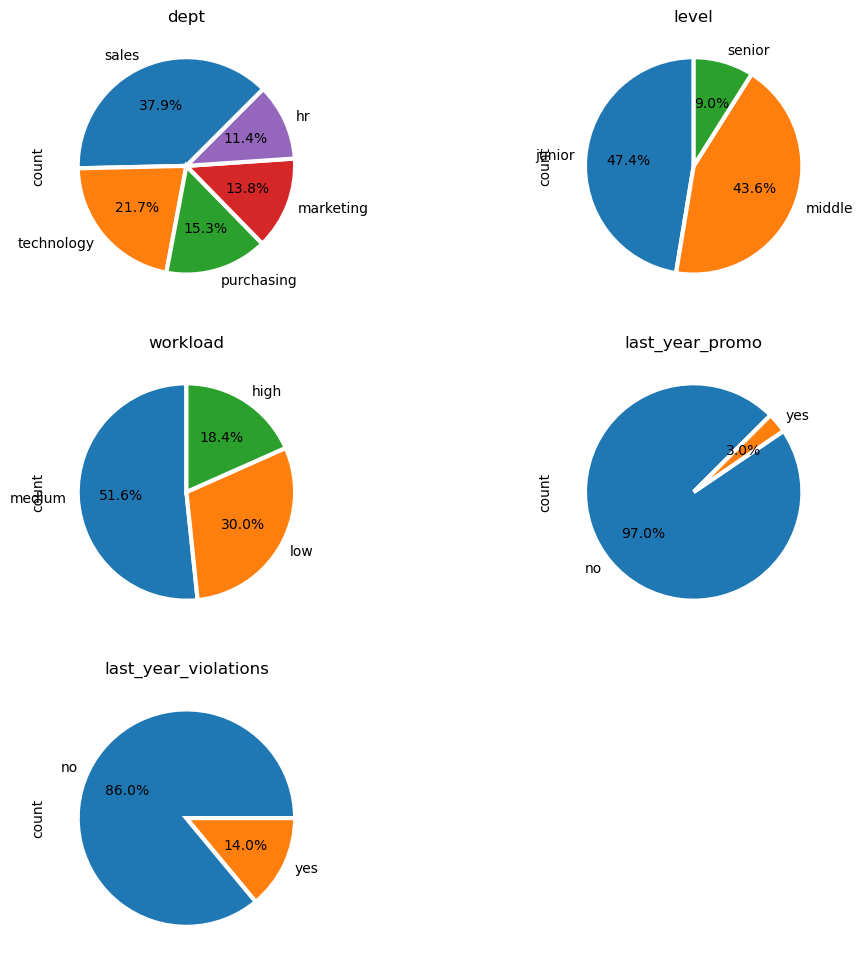

In [46]:
columns = [
    ('dept', 'dept', 45),
    ('level', 'level', 90),
    ('workload', 'workload', 90),
    ('last_year_promo', 'last_year_promo', 45), 
    ('last_year_violations', 'last_year_violations', 0)  # Adding a default angle
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_job_satisf[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()


- No anomalies were detected in the numerical features.
- The categorical data also appears to be in good condition.

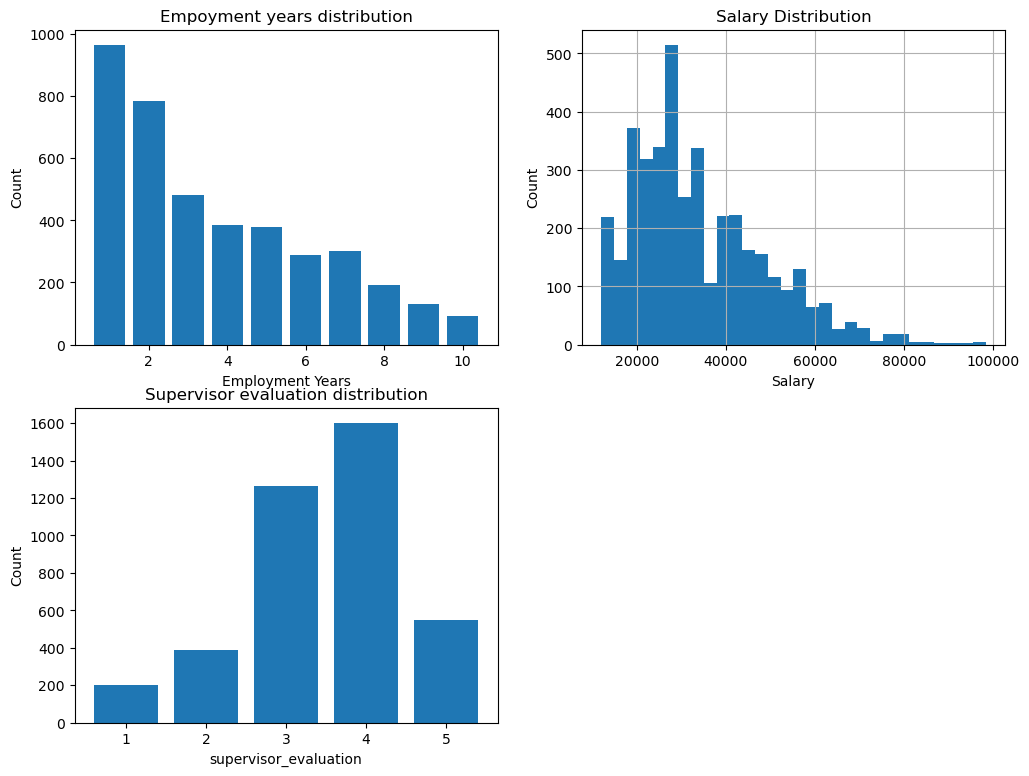

In [48]:
plt.figure(figsize=(12,9))

plt.subplot(2, 2, 1)
years = df_job_satisf['employment_years'].value_counts().sort_index()
plt.bar(years.index, years.values)
plt.xlabel('Employment Years')
plt.ylabel('Count')
plt.title('Empoyment years distribution')

plt.subplot(2, 2, 2)
df_job_satisf['salary'].hist(bins=30)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
eval = df_job_satisf['supervisor_evaluation'].value_counts().sort_index()
plt.bar(eval.index, eval.values)
plt.xlabel('supervisor_evaluation')
plt.ylabel('Count')
plt.title('Supervisor evaluation distribution')
plt.show()


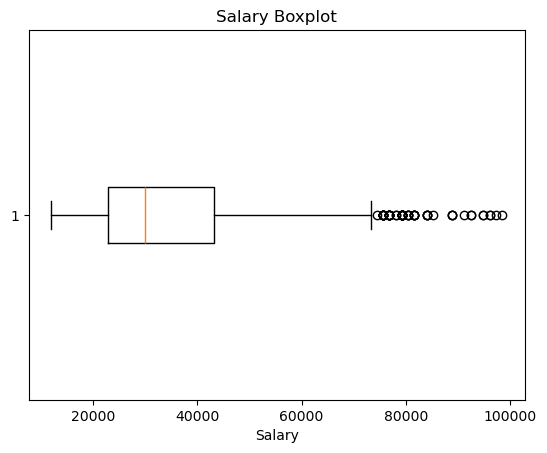

In [49]:
plt.boxplot(df_job_satisf['salary'], vert=False)  
plt.xlabel('Salary')
plt.title('Salary Boxplot')
plt.show()

__Conclusion:__
- In the dataset `df_job_satisf`, it can be observed that most salary data is within the range of 22,800 to 43,200. There are a few outlier values above 70,000.
- Since these outliers represent actual high salaries rather than random data, the decision has been made not to exclude them.

##### Test sample df_test_features

Let's start by analyzing the numerical features. We'll look at the general statistical indicators.

In [53]:
df_test_features.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Further we check categorical features 

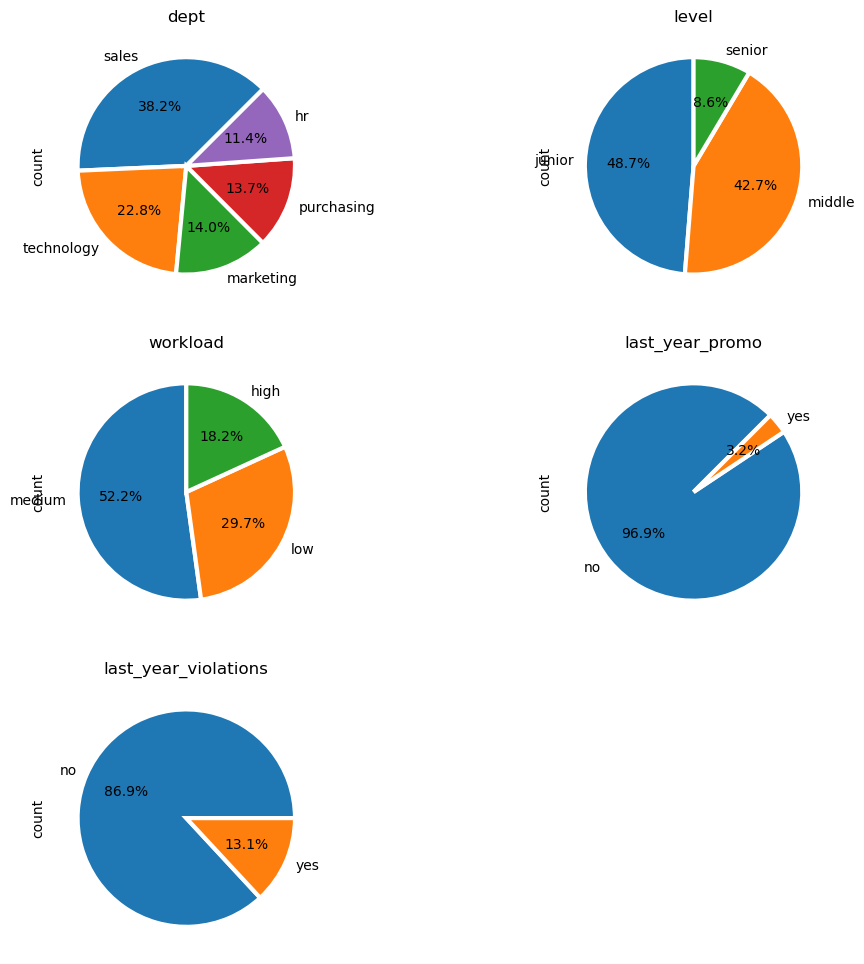

In [55]:
columns = [
    ('dept', 'dept', 45),
    ('level', 'level', 90),
    ('workload', 'workload', 90),
    ('last_year_promo', 'last_year_promo', 45), 
    ('last_year_violations', 'last_year_violations', 0)  # Adding a default angle
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_test_features[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()

__Conclusion:__ 
- No anomalies were found in the quantitative features.
- The categorical data also appears to be in good condition.

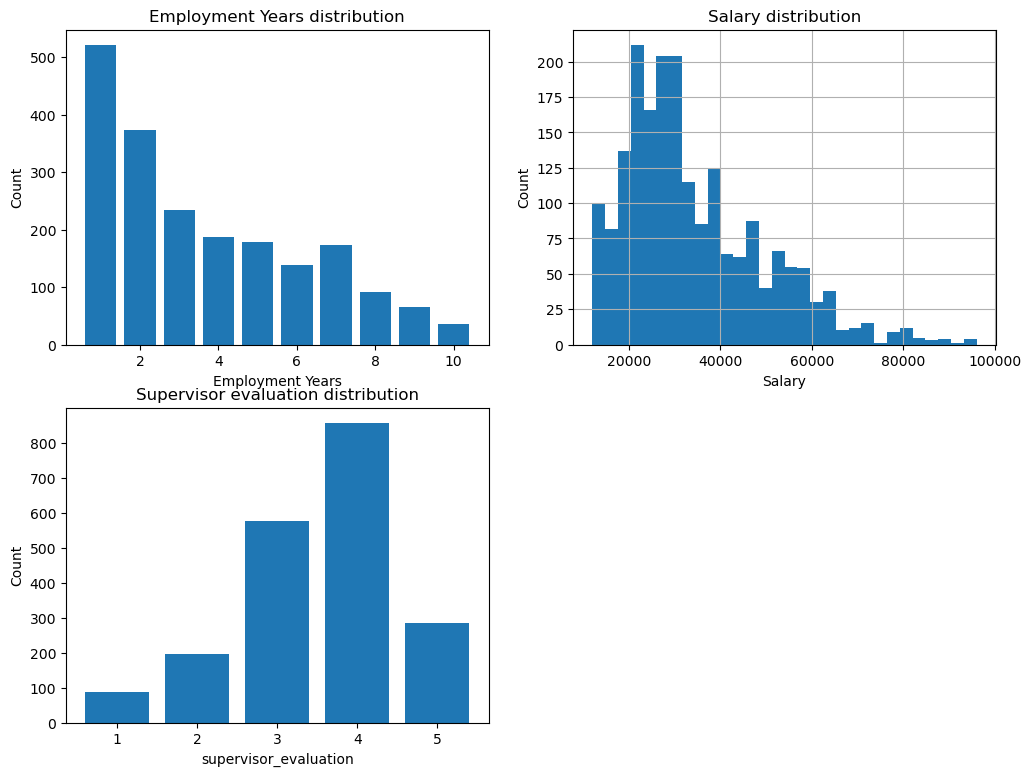

In [57]:
plt.figure(figsize=(12,9))

plt.subplot(2, 2, 1)
years = df_test_features['employment_years'].value_counts().sort_index()
plt.bar(years.index, years.values)
plt.xlabel('Employment Years')
plt.ylabel('Count')
plt.title('Employment Years distribution')

plt.subplot(2, 2, 2)
df_test_features['salary'].hist(bins=30)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
eval = df_test_features['supervisor_evaluation'].value_counts().sort_index()
plt.bar(eval.index, eval.values)
plt.xlabel('supervisor_evaluation')
plt.ylabel('Count')
plt.title('Supervisor evaluation distribution')
plt.show()

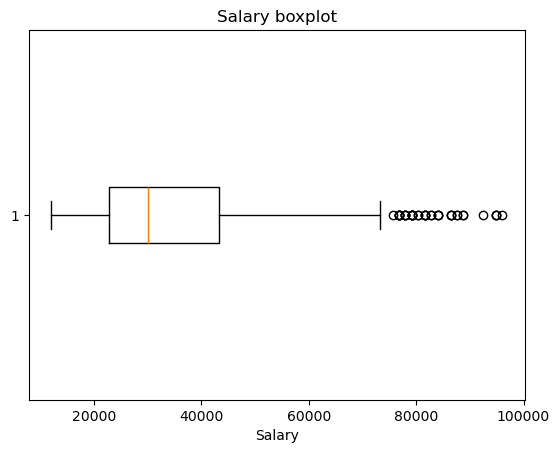

In [58]:
plt.boxplot(df_test_features['salary'], vert=False)  
plt.xlabel('Salary')
plt.title('Salary boxplot')
plt.show()

__Conclusion:__
- The data is similar to the training set. Same conclusions are applied

### Correlation analysis

Let’s begin by exploring the interactions between the features. We  start by building a correlation matrix to examine the relationships between the features.

Let's set the ID as the index so that its not considered in the correlation analysis.

In [63]:
df_job_satisf = df_job_satisf.set_index('id')

In [64]:
interval_cols = ['salary', 'job_satisfaction_rate']

# defines bins for interval_cols
bins = {
    'salary': 5,
    'job_satisfaction_rate': 5
}

# calculate phik correlaction matrix 
phik_matrix = df_job_satisf.phik_matrix(interval_cols=interval_cols, bins=bins)
display(phik_matrix)



,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.271091,0.080419
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.593986,0.054084
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.613955,0.028801
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.495307,0.337103
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.129184,0.094414
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.008618,0.336863
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.040802,0.794519
salary,0.271091,0.593986,0.613955,0.495307,0.129184,0.008618,0.040802,1.000000,0.129237
job_satisfaction_rate,0.080419,0.054084,0.028801,0.337103,0.094414,0.336863,0.794519,0.129237,1.000000


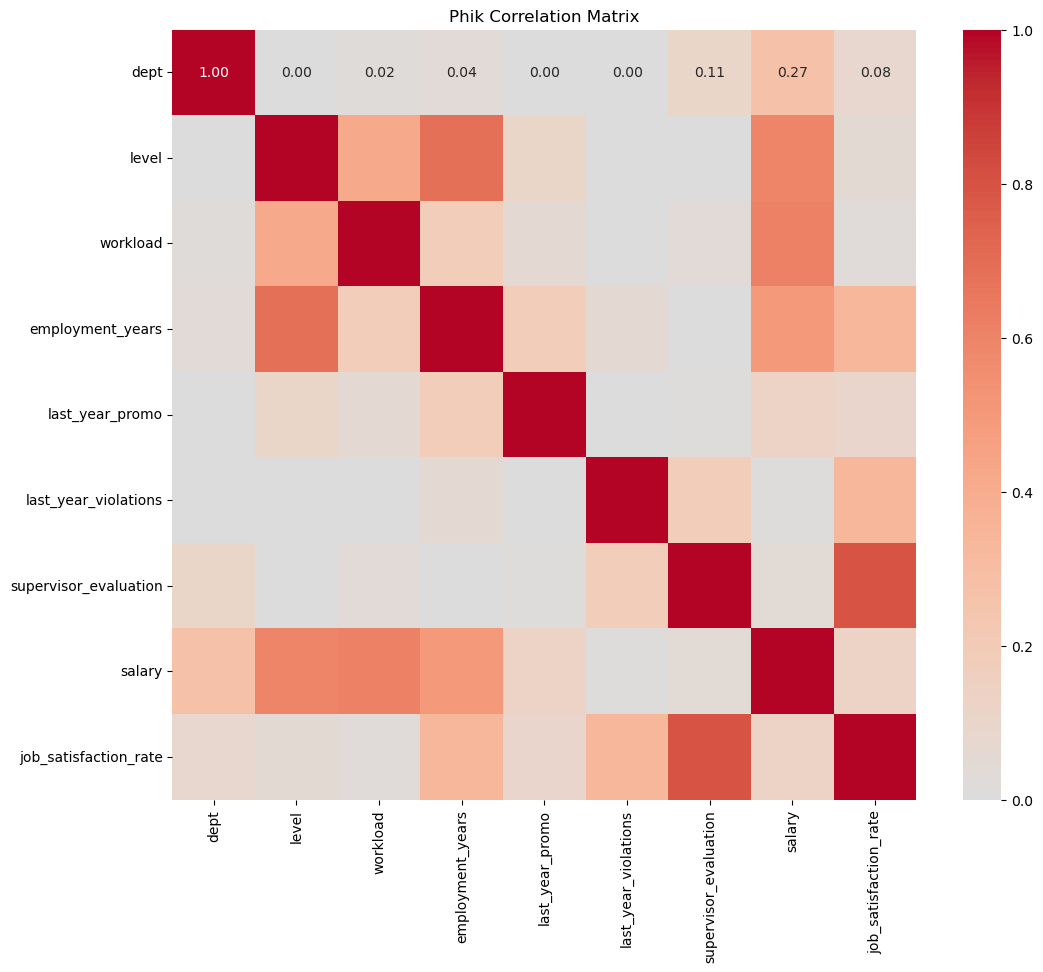

In [65]:
# display matrix 
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Phik Correlation Matrix")
plt.show()

In [66]:
quantitative_features = ['employment_years', 
                         'supervisor_evaluation', 
                         'salary',
                         'job_satisfaction_rate']
vif_data = df_job_satisf[quantitative_features]
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': quantitative_features,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]})
display(vif)

,feature,VIF
0,employment_years,1.358397
1,supervisor_evaluation,2.001941
2,salary,1.275237
3,job_satisfaction_rate,2.093636


Now check the correlation on test data

Set 'id' as index as in the train dataset 

In [69]:
df_test_features = df_test_features.set_index('id')

In [70]:
df_test_features.head(2)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000


In [71]:
interval_cols_test = ['salary']

# define bins for interval_cols_test
bins_test = {
    'salary': 5
}

# calculate phik correlation matrix
phik_matrix_test = df_test_features.phik_matrix(interval_cols=interval_cols_test, bins=bins_test)
display(phik_matrix_test)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
dept,1.000000,0.000000,0.033894,0.000000,0.000000,0.000000,0.060917,0.318534
level,0.000000,1.000000,0.474151,0.689666,0.118258,0.017527,0.000000,0.620376
workload,0.033894,0.474151,1.000000,0.202240,0.035609,0.000000,0.036353,0.597603
employment_years,0.000000,0.689666,0.202240,1.000000,0.173637,0.066371,0.000000,0.499185
last_year_promo,0.000000,0.118258,0.035609,0.173637,1.000000,0.000000,0.011704,0.114057
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000
supervisor_evaluation,0.060917,0.000000,0.036353,0.000000,0.011704,0.189719,1.000000,0.131893
salary,0.318534,0.620376,0.597603,0.499185,0.114057,0.000000,0.131893,1.000000


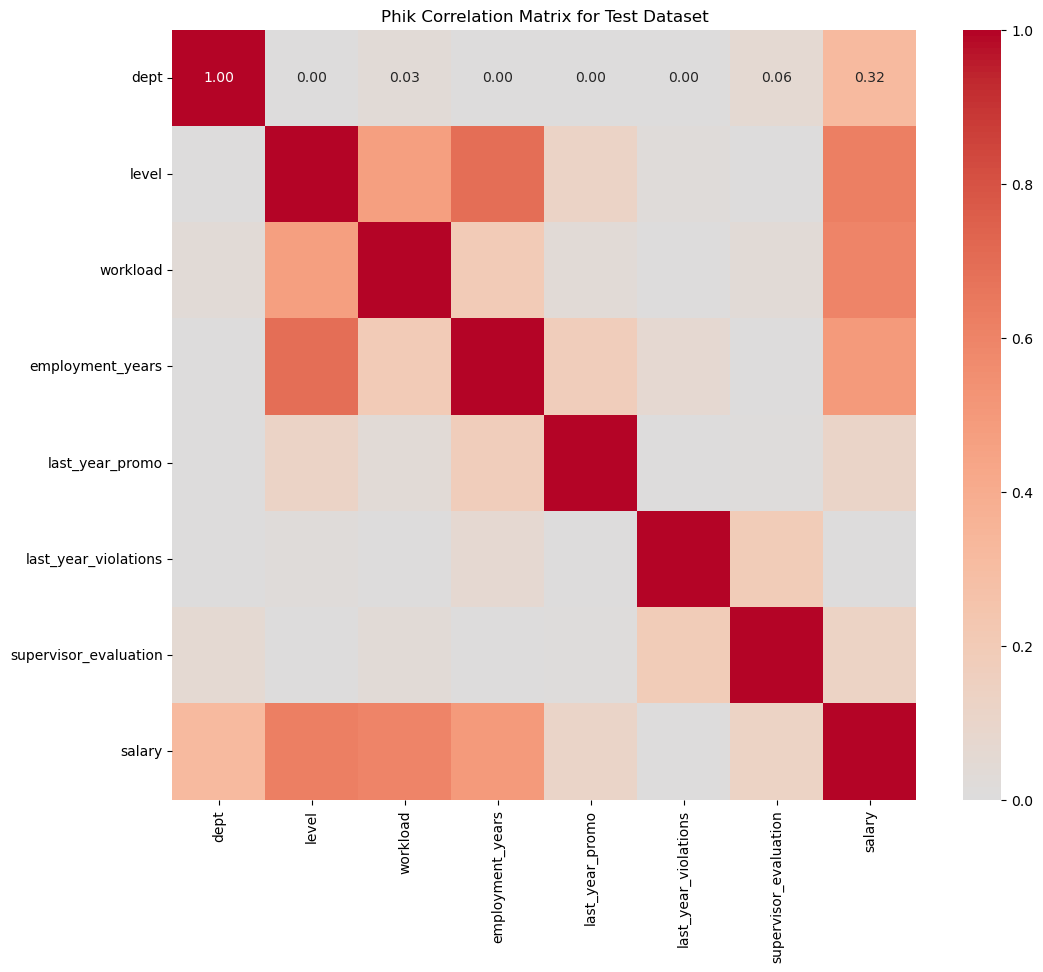

In [72]:
# display matrix
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix_test, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Phik Correlation Matrix for Test Dataset")
plt.show()

**Conclusion:**

Training dataset:
- A high linear dependence was found between the feature `job_satisfaction_rate` and `supervisor_evaluation` with a correlation of 0.79.

Test dataset:
- A strong correlation was found between `level` and `work_experience` with a correlation of 0.69.

### Data Preprocessing

At this stage, we will take the following steps:
1) Prepare the training and test datasets with the target feature being `job_satisfaction_rate`.
2) Process the numerical and categorical features in a pipeline:
   - For numerical features, we will use `StandardScaler()` and `MinMaxScaler()`.
   - For categorical features, we will use `OneHotEncoder` and `OrdinalEncoder`.

In [76]:
# merge test features with target test feature
df_test_full = df_test_features.merge(df_target, on = 'id')
df_test_full.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64


In [77]:
df_test_full = df_test_full.set_index('id')

Check dupliactes after merge 

In [79]:
print(df_job_satisf.duplicated().sum())

245


Delete supliacates 

In [81]:
print(df_job_satisf.shape)
df_job_satisf = df_job_satisf.drop_duplicates()
print(df_job_satisf.shape)

(4000, 9)
(3755, 9)


In [82]:
RANDOM_STATE = 42
# save the training data 
X_train = df_job_satisf.drop(['job_satisfaction_rate'], axis=1)
y_train = df_job_satisf['job_satisfaction_rate']

# save the test data 
X_test = df_test_full.drop(['job_satisfaction_rate'], axis=1)
y_test = df_test_full['job_satisfaction_rate']


In [83]:
# categorical features
ohe_columns = [
    'dept']

In [84]:
#numerical features
num_columns = [
    'employment_years', 'salary', 'supervisor_evaluation']

In [85]:
#ordinal features
ord_columns = [
   'level' ,'workload', 'last_year_promo', 'last_year_violations'
]

In [86]:
# creating a pipeline for features from the list `ohe_columns`.
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)), 
    ]
) 

# creating a pipeline for features from the list `ord_columns`.
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        
        ('ord', OrdinalEncoder(
            categories=[
                ['junior', 'middle', 'senior'],
                ['low', 'medium', 'high'],
                ['no', 'yes'], 
                ['no', 'yes']
            ], 
            handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 
# creating a pipeline for features from the list `num_columns`.
num_preprocessor_standard = Pipeline([
    ('simpleImputer_num', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

num_preprocessor_minmax = Pipeline([
    ('simpleImputer_num', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [87]:
# create data preprocessing pipeline
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ] , 
    remainder='passthrough'
) 

### Model Training 


1) We will perform hyperparameter tuning using `GridSearchCV`.

2) We will prepare the final pipeline and a dictionary for two models, which will include hyperparameters:
   - `DecisionTreeRegressor()`
   - `LogisticRegression()`

3) We will create a `DummyRegressor` model to check the baseline.

4) We will use custom metric SMAPE as the evaluation metric for the best model 

#### SMAPE metric 


- create new custom metric  SMAPE
- 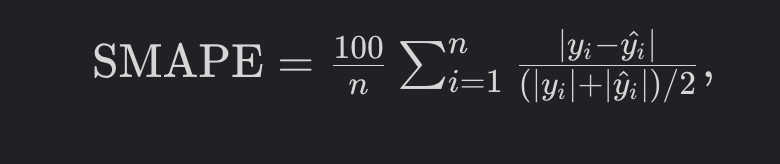
- apply this metric by hyperparameters search


In [92]:
# create SMAPE function
def smape(y_true, y_pred):
   
   y_true = np.array(y_true)
   y_pred = np.array(y_pred)
    
   numerator = np.abs(y_true - y_pred)
   denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
   denominator = np.where(denominator == 0, 1, denominator)
   smape_value = np.mean(numerator / denominator) * 100  
   
   return smape_value

In [93]:
# create custom metric
scorer = make_scorer(smape, greater_is_better=False)

#### Model training 

In [95]:
# create final pipeline for preprocessing and model 
pipe_final = Pipeline(
    [ 
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [96]:
# create model grid
param_grid = [
    # grid for DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']    
    },
    
    # grid for LinearRegression()
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }

]


In [299]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scorer,
    n_jobs=-1
)

# Run the search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          Simple...
                          'models__max_depth': range(2, 15),
                          'models__max_features': range(2, 15),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LinearRegression()],
                          'models__fit_intercept': [True, False],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [98]:
# create and train DummyRegressor 
reg_dummy = DummyRegressor(strategy="mean") 
reg_dummy.fit(X_train, y_train)

y_pred = reg_dummy.predict(X_test)
# evaluate model on test data 
smape_score = smape(y_test, y_pred)

print(f'Dummy Regressor SMAPE Score: {smape_score:.2f}')

Dummy Regressor SMAPE Score: 38.26


#### Best model and metric 

In [100]:
print('Best model and its parameters :\n', grid_search.best_estimator_) 

Best model and its parameters :
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                          

In [101]:
best_smape_score = -1 * grid_search.best_score_
print('SMAPE metric for the best model :\n', best_smape_score)

SMAPE metric for the best model :
 15.727339261457999


In [102]:
result = pd.DataFrame(grid_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(3))


,rank_test_score,param_models,mean_test_score,params
466,1,DecisionTreeRegressor(random_state=42),-15.727339,{'models': DecisionTreeRegressor(random_state=...
463,1,DecisionTreeRegressor(random_state=42),-15.727339,{'models': DecisionTreeRegressor(random_state=...
460,1,DecisionTreeRegressor(random_state=42),-15.727339,{'models': DecisionTreeRegressor(random_state=...



- As a result of the tests, the best model obtained was the Decision Tree Regressor with a SMAPE metric of 15.7
- Additionally, this result is better than the metric of the Dummy model (38), indicating that the model tuning was successful.

Check the model on test data 

In [105]:
y_test_pred = grid_search.predict(X_test)
smape_value = smape(y_test, y_test_pred)

print(f'SMAPE on test data: {smape_value:.2f}')

SMAPE on test data: 14.34


In [106]:
best_smape_model = grid_search.best_estimator_

**Conclusions**
- Decision Tree Regression performs the best in finding the solution, as indicated by the SMAPE metrics.

## Prediction of Employee Resignation from the Company

### Data Preparation

Lets preprocess the data for `df_train_quit` and `df_test_target_quit` (target feature)

#### Data preparation of df_train_quit dataset

In [112]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [113]:
print(df_train_quit.duplicated().sum())

0


In [114]:
df_train_quit['dept'].value_counts()

dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: count, dtype: int64

In [115]:
df_train_quit['level'].value_counts()

level
junior    1949
middle    1694
sinior     357
Name: count, dtype: int64

Correct the typo

In [117]:
df_train_quit['level'] = df_train_quit['level'].replace('sinior', 'senior')
df_train_quit['level'].unique()

array(['middle', 'junior', 'senior'], dtype=object)

In [118]:
df_train_quit['workload'].value_counts()

workload
medium    2118
low       1208
high       674
Name: count, dtype: int64

**Conclusion:**
- The dataset `df_train_quit` contains 4000 observations and 9 features + ID.
- There are no missing values.
- Duplicate check was performed, and none were found.
- Data types are in order.
- A typo was corrected.

#### Preparation of df_test_target_quit dataset

In [121]:
df_test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Conclusion:**
- The dataset `df_test_target_quit` contains 2000 observations and one feature + ID.
- There are no missing values.
- Data types are in order.

### Exploratory data analysis (EDA)

#### Statistic analysis

In [125]:
df_train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


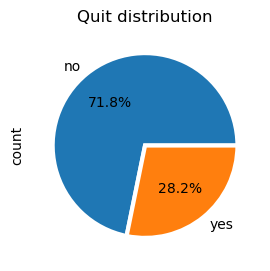

In [126]:
plt.figure(figsize=(6,3))
data = df_train_quit['quit'].value_counts()
data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Quit distribution')

plt.show()

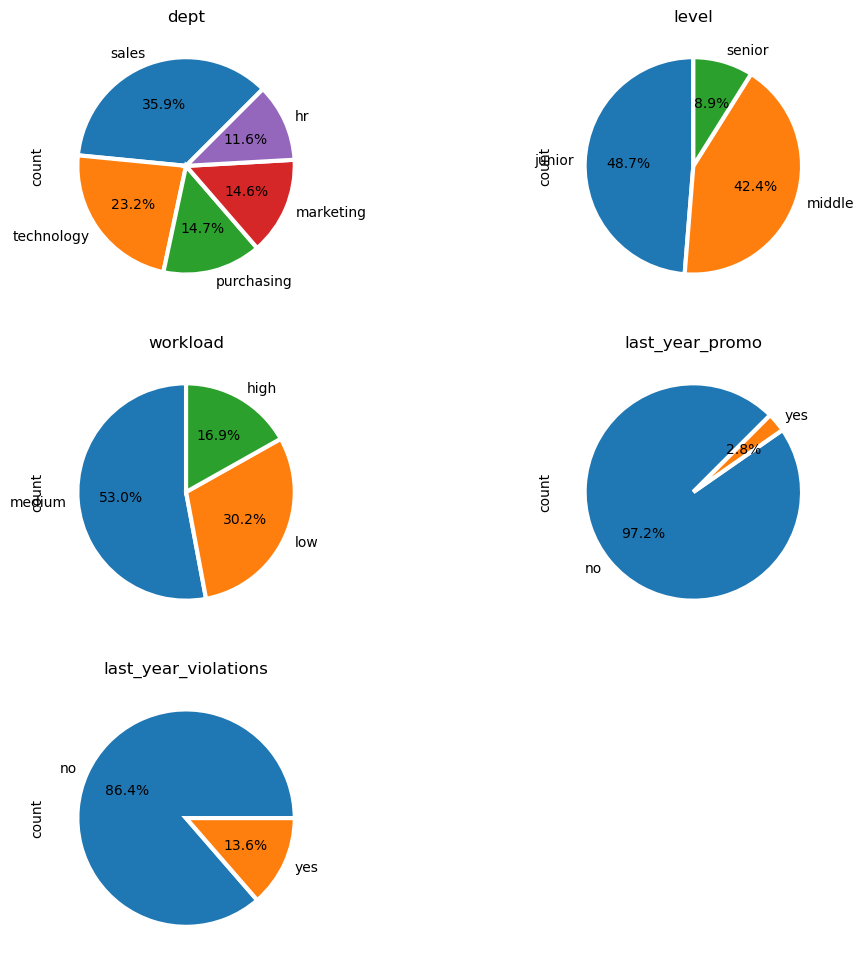

In [127]:
columns = [
    ('dept', 'dept', 45),
    ('level', 'level', 90),
    ('workload', 'workload', 90),
    ('last_year_promo', 'last_year_promo', 45), 
    ('last_year_violations', 'last_year_violations', 0)  
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_train_quit[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()

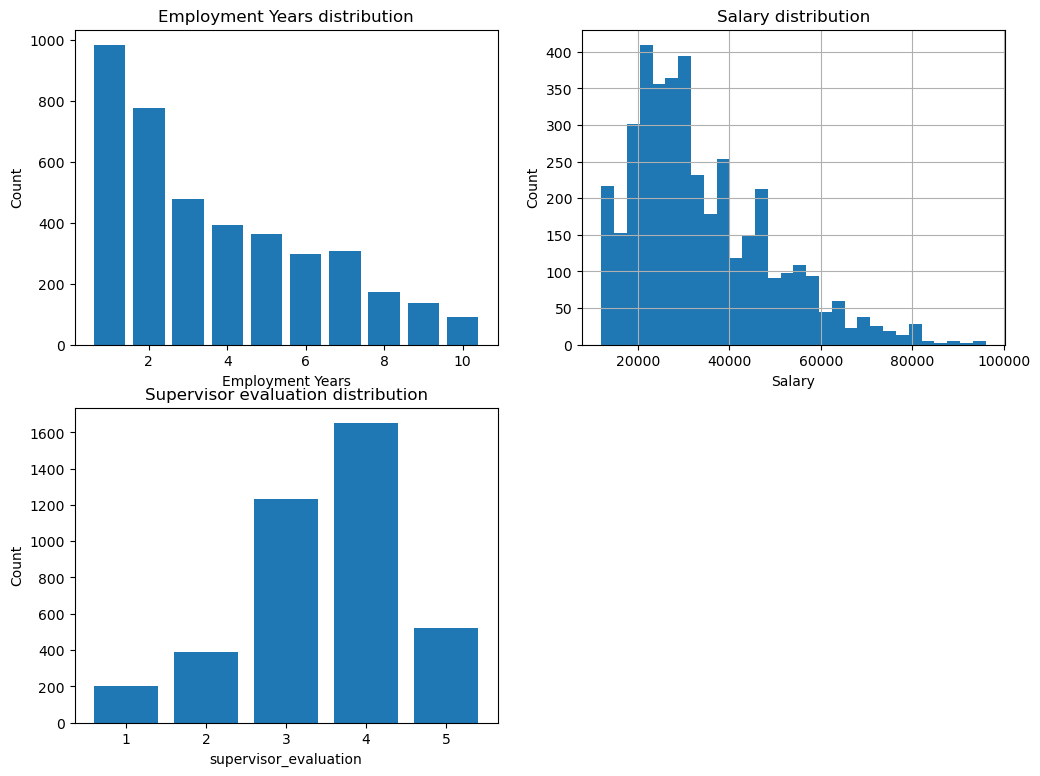

In [128]:
plt.figure(figsize=(12,9))

plt.subplot(2, 2, 1)
years = df_train_quit['employment_years'].value_counts().sort_index()
plt.bar(years.index, years.values)
plt.xlabel('Employment Years')
plt.ylabel('Count')
plt.title('Employment Years distribution')

plt.subplot(2, 2, 2)
df_train_quit['salary'].hist(bins=30)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
eval = df_train_quit['supervisor_evaluation'].value_counts().sort_index()
plt.bar(eval.index, eval.values)
plt.xlabel('supervisor_evaluation')
plt.ylabel('Count')
plt.title('Supervisor evaluation distribution')
plt.show()

#### Correlation analysis

In [130]:
df_train_quit = df_train_quit.set_index('id')

In [131]:
interval_cols = ['salary']
# define bins for interval_cols
bins = {
    'salary': 5
}
# calculate phik matrix 
phik_matrix = df_train_quit.phik_matrix(interval_cols=interval_cols, bins=bins)
display(phik_matrix)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.240468,0.000000
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.616707,0.312799
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.607463,0.132243
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.512893,0.659093
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.122208,0.157370
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.025583,0.185071
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.036382,0.245489
salary,0.240468,0.616707,0.607463,0.512893,0.122208,0.025583,0.036382,1.000000,0.322207
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.322207,1.000000


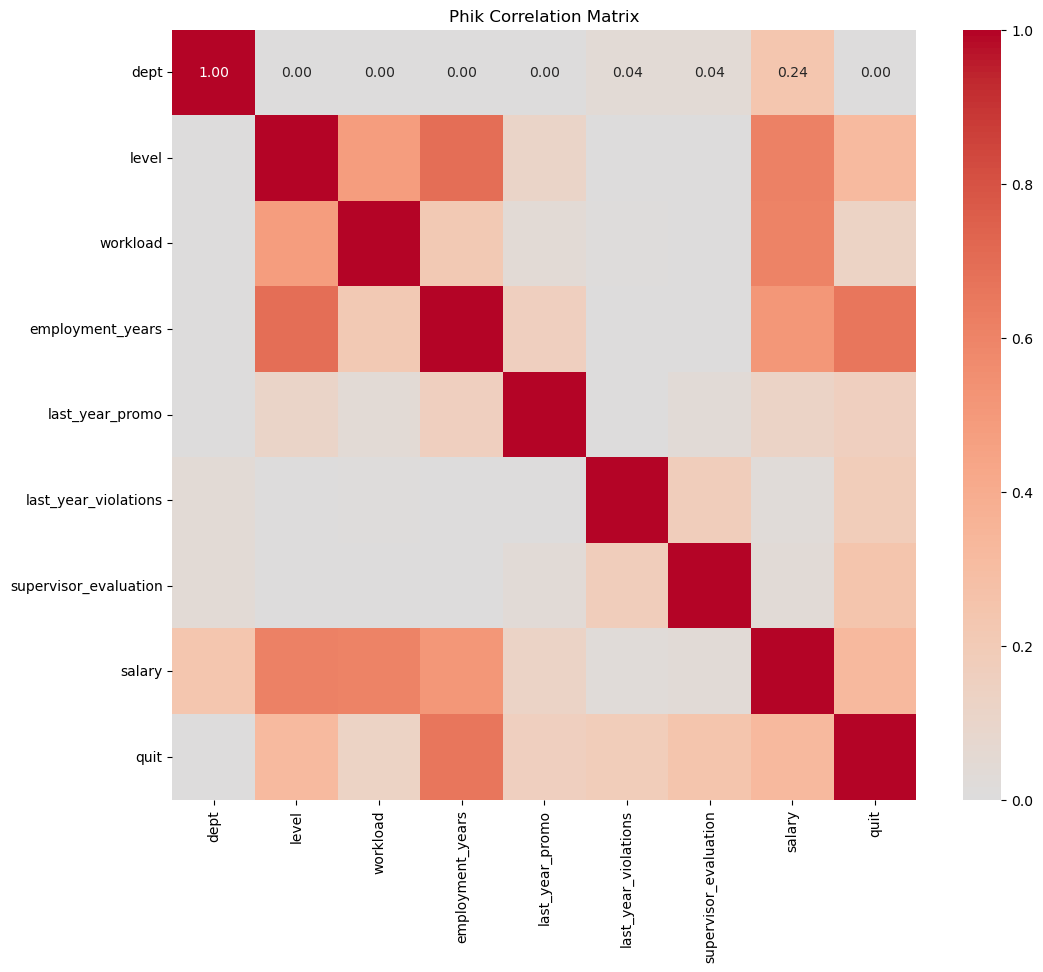

In [132]:
# display matrix
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Phik Correlation Matrix")
plt.show()

- A high correlation was found between job level and work experience (0.69).

#### Portrait of a "resigned employee."

Let's define a profile of a resigned employee based on available features

In [136]:
df_quited = df_train_quit[df_train_quit['quit'] == 'yes']

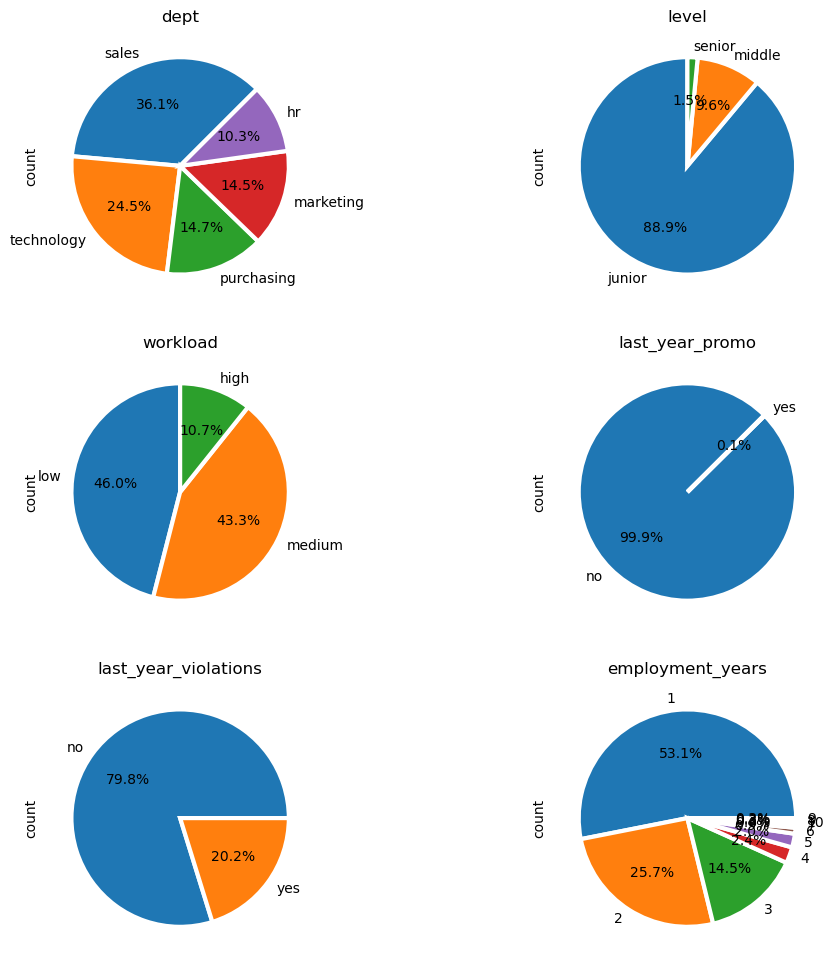

In [137]:
columns = [
    ('dept', 'dept', 45),
    ('level', 'level', 90),
    ('workload', 'workload', 90),
    ('last_year_promo', 'last_year_promo', 45), 
    ('last_year_violations', 'last_year_violations', 0), 
    ('employment_years', 'employment_years', 0)
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_quited[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()

In [138]:
dept_group = df_quited['dept'].value_counts()
dept_group

dept
sales         407
technology    276
purchasing    166
marketing     163
hr            116
Name: count, dtype: int64

In [139]:
mean_salary_quite = df_quited['salary'].mean()
df_stayed = df_train_quit[df_train_quit['quit'] == 'no']
mean_salary_stayed = df_stayed['salary'].mean()

print(f"The average salary of resigned employees.: {round(mean_salary_quite) }")
print(f": The average salary of stayed employees. {round (mean_salary_stayed)}")

The average salary of resigned employees.: 23885
: The average salary of stayed employees. 37702


**Conclusions**
- Most often, employees resigned from departments such as Sales and IT.
- The majority of those who resigned had a low or medium workload.
- A large number of those who resigned were juniors (89%) and also those who did not receive promotions.
- They also earned significantly less on average compared to those who stayed.
- In half of the cases, they worked at the company for about one year.
- They mostly had no violations.

#### The dependence between employee satisfaction and resignation 

Analysts claim that an employee's level of job satisfaction in the company influences whether the employee will resign. Let's test this statement on the test sample.

In [143]:
# test sample with two target features
df_test_combined = df_test_full.merge(df_test_target_quit, on = 'id')
df_test_combined.head(2)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no


In [144]:
df_test_quited = df_test_combined[df_test_combined['quit'] == 'yes']
df_test_stayed = df_test_combined[df_test_combined['quit'] == 'no']

To test the claim that job satisfaction levels influence whether an employee will resign, a statistical test like a t-test can be conducted. This test would compare the mean job satisfaction levels between two groups: employees who resigned and those who remained with the company.


**Formulating Hypotheses**

**Null Hypothesis (H0):** The mean job satisfaction level is the same in both groups (employees who resigned and those who stayed).

**Alternative Hypothesis (H1):** The mean job satisfaction level differs between the groups.

In [147]:
satisfaction_quit = df_test_quited['job_satisfaction_rate']
satisfaction_stayed = df_test_stayed['job_satisfaction_rate']

#  t-test
_, p_value = ttest_ind(satisfaction_quit, satisfaction_stayed, equal_var=False)


print(f"p-value: {p_value}")

# compare p-value with the significance threshold
if p_value < 0.05:
    print("We reject the null hypothesis. The level of job satisfaction significantly differs between employees who have left and those who have stayed.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference in the level of job satisfaction between employees who have left and those who have stayed..")

p-value: 2.7708628031543735e-101
We reject the null hypothesis. The level of job satisfaction significantly differs between employees who have left and those who have stayed.


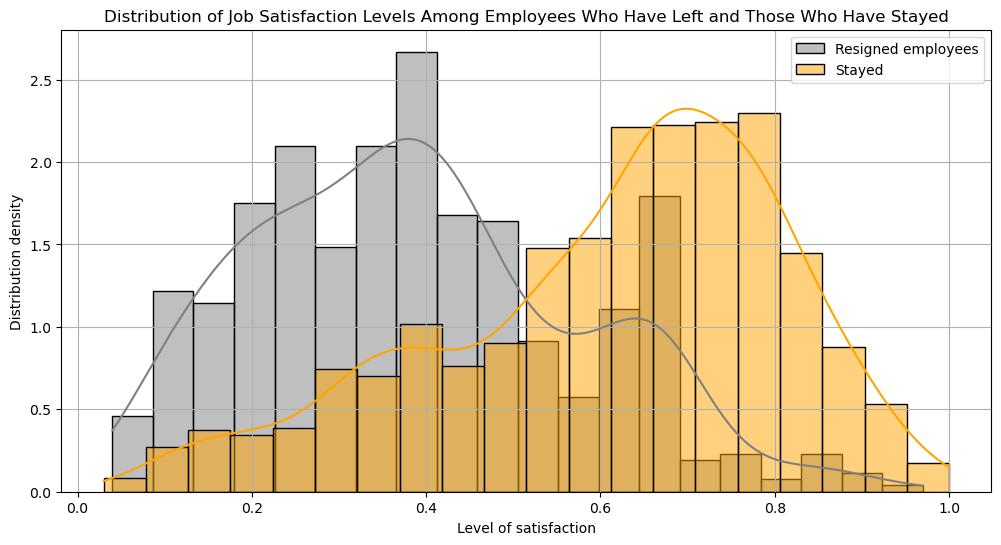

In [313]:
plt.figure(figsize = (12,6))
sns.histplot(df_test_quited['job_satisfaction_rate'], 
             stat='density', common_norm=False,                
             bins = 20, color = 'gray', 
                             kde = True, 
                             label = 'Resigned employees' )
sns.histplot(df_test_stayed['job_satisfaction_rate'], stat='density', common_norm=False,
                            bins = 20, color = 'orange',
                            kde = True, 
                            label = 'Stayed')

plt.title('Distribution of Job Satisfaction Levels Among Employees Who Have Left and Those Who Have Stayed')
plt.xlabel('Level of satisfaction')
plt.ylabel('Distribution density')
plt.legend()
plt.grid(True)

plt.show()

**Conclusions**

- The t-test indicated that the satisfaction levels are different between those who stayed and those who left.
From the graph, it can be observed that:
- Most often, employees who left had a satisfaction level of 0.4, with very few having a satisfaction level greater than 0.7. In other words, there were very few who were highly satisfied.
- For the employees who stayed, the satisfaction level was most commonly between 0.6 and 0.8, which is a relatively high indicator.
- Thus, there does appear to be a connection between satisfaction level and employee turnover.

### Adding new Input Feature 

Since job satisfaction and quitting are related, we will add the predicted feature from the best model as an input feature to the second task.

Prepare training and test datasets
target feature - quit

In [153]:
df_test_combined = df_test_combined.set_index('id')

In [154]:
# save training data 
X_train_2 = df_train_quit.drop(['quit'], axis=1)
y_train_2 = df_train_quit['quit']

# save test data
X_test_2 = df_test_combined.drop(['job_satisfaction_rate', 'quit'], axis=1)
y_test_2 = df_test_combined['quit']

In [155]:
print(X_train_2.shape)
print(X_test_2.shape)

(4000, 8)
(2000, 8)


Using the best model from Task 1 we find the predictions for job_satisfaction and record them in a separate column for the second dataset

In [157]:
train_predictions = best_smape_model.predict(X_train_2)
test_predictions = best_smape_model.predict(X_test_2)

X_train_2['satisfaction_prediction'] = train_predictions
X_test_2['satisfaction_prediction'] = test_predictions


In [158]:
print("Train columns:", X_train_2.columns)
print("Test columns:", X_test_2.columns)

Train columns: Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'satisfaction_prediction'],
      dtype='object')
Test columns: Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'satisfaction_prediction'],
      dtype='object')


### Data Preprocessing

At this stage, we will take the following steps:
1) Prepare the training and test datasets with the target feature being `job_satisfaction_rate`.
2) Process the numerical and categorical features in a pipeline:
   - For numerical features, we will use `StandardScaler()` and `MinMaxScaler()`.
   - For categorical features, we will use `OneHotEncoder` and `OrdinalEncoder`.
   - for target feature LabelEncoder

In [322]:
#code the target feature
label_encoder = LabelEncoder()
y_train_2_encoded = label_encoder.fit_transform(y_train_2)
y_test_2_encoded = label_encoder.transform(y_test_2)

In [324]:
#numeric features 
num_columns_2 = [
    'employment_years', 'salary', 'satisfaction_prediction', 'supervisor_evaluation']

In [326]:
data_preprocessor_2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns_2)
    ] , 
    remainder='passthrough'
) 

### Model training 

1) We will perform hyperparameter selection using GridSearchCV
2) Prepare the final pipelines and grid for the four models, which will include the hyperparameters 
- DecisionTreeClassifier()
- LogisticRegression()
- KNeighborsClassifier()
- SVM ()
3) Create a DummyClassifier model to check the baseline 
4) We will use ROC AUC as a metric (success criterion ≥0.91).

In [330]:
# create final pipeline
pipe_final_2 = Pipeline(
    [
        ('preprocessor', data_preprocessor_2),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [332]:
# create dictionairies
param_grid_2 = [
    # Dictionary for DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Dictionary for LogisticRegression
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }
]

In [334]:
grid_search = GridSearchCV(
    pipe_final_2, 
    param_grid_2, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
#train the model 
grid_search.fit(X_train_2, y_train_2_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          Simple...
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(random_state=42,
                                                        solver='liblinear')],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [335]:
# создадим и обучим DummyClassifier
clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train_2, y_train_2_encoded)

# оценка модели на тестовой выборке
score = clf_dummy.score(X_test_2, y_test_2_encoded)

print(f'Dummy Classifier Score: {score}')

Dummy Classifier Score: 0.718


In [336]:
grid_search.fit(X_train_2, y_train_2_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          Simple...
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(random_state=42,
                                                        solver='liblinear')],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

#### Best model and metrics

In [345]:
print('Best model and its parameters:\n\n', grid_search.best_estimator_) 

Best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                          

In [347]:
print('ROC-AUC metric for the best model:\n', grid_search.best_score_)

ROC-AUC metric for the best model:
 0.9286472091934463


The best identified model SVM with metric  ROC_AUC 0.92

In [349]:
# save best model 
best_model = grid_search.best_estimator_
#predict on test sample
y_test_proba_2 = best_model.predict_proba(X_test_2)[:, 1]

#metric
roc_auc_2 = roc_auc_score(y_test_2_encoded, y_test_proba_2)
print(f'ROC AUC Score: {roc_auc_2:.2f}')

ROC AUC Score: 0.93


Result based on test meric - 0.93

#### Confusion matrix

In [178]:
y_test_pred = best_model.predict(X_test_2)
cm = confusion_matrix(y_test_2_encoded, y_test_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test_2), columns=np.unique(y_test_2))
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
       no  yes
no   1339   97
yes   118  446


**Conclusion**
- 1339 times the model correctly predicted that an employee would not quit 
- 446 times correctly predicted that the employee would quit 
- 97 times the model predicted that the employee would quit, but the employee did not quit (FP error type 1)
- 118 times predicted that the employee would not quit, but the employee quit (FN error type 2)

Thus can observe that the model performs well in classification.

#### Distributions of job satisfaction that were predicted to be dismissed 

Let's look at the distributions of job satisfaction that were predicted to be dismissed 

In [182]:
df_test_combined.head(2)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no


In [183]:
df_test_combined['quit_predictions'] = grid_search.predict(X_test_2)

In [184]:
df_test_combined_quit_predicted = df_test_combined[df_test_combined['quit_predictions'] == 1]


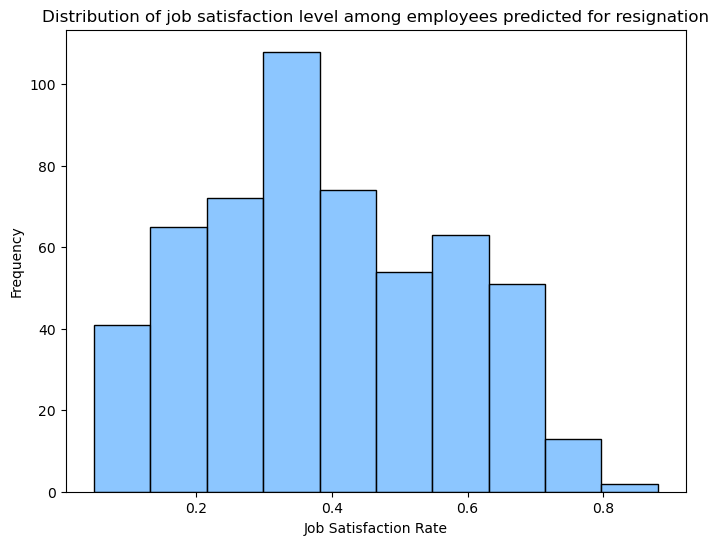

In [351]:
plt.figure(figsize=(8, 6))
sns.histplot(df_test_combined_quit_predicted['job_satisfaction_rate'], bins=10, kde=False, color='#66b3ff')

# Add title and labels
plt.title('Distribution of job satisfaction level among employees predicted for resignation')
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Frequency')

# Show plot
plt.show()

The graph shows that the majority of those predicted to be quited are not satisfied with their working conditions

## Final Conclusion

**Objective**

The task at hand is to develop a solution to predict employee resignation from the company, taking into account their level of job satisfaction.

The task is divided into two parts: 
1) to predict the level of employee satisfaction
2) to predict the employee's resignation from the company. 

**Source data and preprocessing**

The input data were 
- two training datasets with target features - job satisfaction and quit.
- two test datasets with target features 
- a test dataset with common input attributes for the two tasks. 

The data were analyzed for outliers, duplicates, correlation and exploratory analysis were performed

**Finding the best model**

To find the best model task 1 a pipline was created which consisted of data preparation (coding, mashup) and searching for the best model among Decision Tree Regressor and Liniar regression. 
A grid search for hyperparameters was chosen, and a custom SMAPE metric was used to validate on the test sample and in the selection of hyperparameters. 

For the second task a new attribute - job satisfaction - was added to the to the dataset as a new input feature. The search of the best model has been conducted among Decision Tree Classifier, Logistic regression, kNN, SVM. 

**Best model**
As a result of the tests the best model was obtained - Decision Regression for the first task and SMAPE (14 on test sample)), for the second task the best solution was SVM model with ROC_AUC 0.92 on the test sample

**Solutions for Business**
Analyzing the results of the model, quite a lot of employees may quit and 70% of them are not satisfied with their jobs. 
Possible recommendations for the business: 
- Creating a feedback culture to discuss with employees their successes, goals, problems and wishes
- recognizing employee achievements
- offering trainings, seminars and courses for professional development of employees
- possible introduction of hybrid/flexible working hours
- provide comfortable working conditions and psychological support
- review compensation and bonuses
- improve corporate culture
- it is important to conduct satisfaction surveys to better understand why employees leave the company


